In [1]:
# importing essentials
import numpy as np
import pandas as pd

# to make sure we use tensorflow as our backend, so the image format will be depth/channel last
from keras import backend as K
K.set_image_dim_ordering('tf')
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
import numpy as np
from random import shuffle
from tqdm import tqdm

C:\Users\DELL\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
TRAIN_DIR = 'E:/full stack python/Traine_DATA/Traine_DATA'
# TRAIN_DIR = 'C:/Users/DELL/SkyDrive/Documents/data2/train_data'
# TEST_DIR = 'J:/SONGS/LAP DOWNLOAD/GEETA/Compressed/Data of saudia/tes'
TEST_DIR = 'E:/full stack python/Test_DATA/Test_DATA'
# TEST_DIR = 'C:/Users/DELL/SkyDrive/Documents/data2/test_data'
IMG_SIZE = 50

In [3]:
def label_img(img):
    word_label = img.split('.')#[-3]
    s=word_label[0]
 # DIY One hot encoder
    if 'appy' in s : 
        return [1, 0, 0, 0]
    elif 'sad' in  s: 
        return [0, 1, 0, 0]
    elif 'ngry' in  s: 
        return [0, 0, 1, 0] 
    elif (('ormal' in  s ) or ('eutral' in  s)): 
        return [0, 0, 0, 1] 

In [4]:
training_data = []
 
    # tqdm is only used for interactive loading
    # loading the training data
for img in tqdm(os.listdir(TRAIN_DIR)):

    # labeling the images
    label = label_img(img)

    path = os.path.join(TRAIN_DIR, img)

    # loading the image from the path and then converting them into
    # greyscale for easier covnet prob
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    # resizing the image for processing them in the covnet
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

    # final step-forming the training data list with numpy array of the images
    training_data.append([np.array(img), np.array(label)])

# shuffling of the training data to preserve the random state of our data
shuffle(training_data)

100%|██████████████████████████████████████| 1228/1228 [00:25<00:00, 47.96it/s]


In [5]:
split_value=int(len(training_data) * .3) # 30 /70 split 
train = training_data[:-split_value]
test = training_data[-split_value:]


In [6]:
train_features = np.array([i[0] for i in train]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
train_labels = np.array([i[1] for i in train])
val_features = np.array([i[0] for i in test]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
val_labels = np.array([i[1] for i in test])

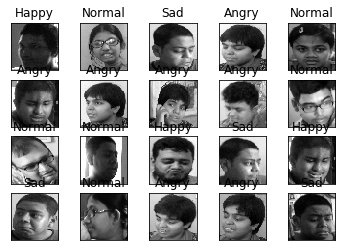

In [13]:
# ************************************TRAINING IMAGES ********************************************
import matplotlib.pyplot as plt
# if you need to create the data:
# test_data = process_test_data()
# if you already have some saved:
# test_data = np.load('test_data.npy')
 
fig = plt.figure()
 
for num, data in enumerate(training_data[:20]):
    # cat: [1, 0]
    # dog: [0, 1]
     
    img_num = data[1]
    img_data = data[0]
     
    y = fig.add_subplot(4, 5, num + 1)
    orig = img_data
    data = img_data.reshape(IMG_SIZE, IMG_SIZE, 1)
 
    # model_out = model.predict([data])[0]
#     model_out = model.predict([data])[0]
#     print(np.argmax(model_out))
    if np.argmax(img_num) == 0:
        str_label ='Happy'
    elif np.argmax(img_num) == 1:
        str_label ='Sad'
    elif np.argmax(img_num) == 2:
        str_label ='Angry'
    elif np.argmax(img_num) == 3:
        str_label ='Normal'
        
    
         
    y.imshow(orig, cmap ='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
#     print('\n')
plt.show()

In [8]:
print('x: ', train_features.shape)
print('Y: ', train_labels.shape)
print('test_x shape: ', val_features.shape)
print('test_y shape: ', val_labels.shape)

x:  (860, 50, 50, 1)
Y:  (860, 4)
test_x shape:  (368, 50, 50, 1)
test_y shape:  (368, 4)


In [9]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input, Dropout
from keras.models import Model, load_model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
def get_model(input_shape):
    
    drop = 0.3
    
    X_input = Input(input_shape)
    
    X = Conv2D(64, (5,5), strides=(1,1), activation='relu', 
               kernel_initializer='glorot_normal')(X_input)
    X = MaxPooling2D((2,2))(X)
    
    X = Conv2D(128, (5,5), strides=(1,1), activation='relu',
              kernel_initializer='glorot_normal')(X)
    
    X = MaxPooling2D((2,2))(X)
    
    X = Flatten()(X)
    
    X = Dense(256, activation='relu')(X)
    X = Dropout(drop)(X)
    
    X = Dense(32, activation='relu')(X)
    X = Dropout(drop)(X)
    
    X = Dense(4, activation='softmax')(X)
    
    model = Model(inputs=[X_input], outputs=[X])
    
    
    return model

In [10]:
from keras.optimizers import Nadam
opt = Nadam(lr=0.001)

In [11]:
model = get_model((50, 50, 1))
# compile the model
# model = get_model((train_features))
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
from keras.callbacks import ModelCheckpoint
# only save the best model
f_path = 'modelf.h5'
msave = ModelCheckpoint(f_path, save_best_only=True)

In [13]:
epochs = 25
batch_size = 64
training = model.fit(train_features, train_labels,
                     validation_data=(val_features, val_labels),
                     epochs=epochs,
                     callbacks=[msave],
                     batch_size=batch_size, 
                     verbose=1)

Train on 860 samples, validate on 368 samples
Epoch 1/25
860/860 [==============================] - ETA: 19s - loss: 8.6399 - acc: 0.34 - ETA: 16s - loss: 9.6182 - acc: 0.33 - ETA: 14s - loss: 10.2738 - acc: 0.317 - ETA: 12s - loss: 10.6453 - acc: 0.304 - ETA: 10s - loss: 10.8748 - acc: 0.290 - ETA: 9s - loss: 10.9225 - acc: 0.286 - ETA: 8s - loss: 10.9457 - acc: 0.28 - ETA: 6s - loss: 10.9109 - acc: 0.29 - ETA: 5s - loss: 11.0841 - acc: 0.28 - ETA: 4s - loss: 11.2368 - acc: 0.27 - ETA: 3s - loss: 11.0846 - acc: 0.27 - ETA: 1s - loss: 10.9652 - acc: 0.28 - ETA: 0s - loss: 11.0103 - acc: 0.28 - 20s 23ms/step - loss: 11.0237 - acc: 0.2779 - val_loss: 7.1865 - val_acc: 0.3179
Epoch 2/25
860/860 [==============================] - ETA: 16s - loss: 6.8032 - acc: 0.28 - ETA: 14s - loss: 4.7285 - acc: 0.28 - ETA: 13s - loss: 4.3893 - acc: 0.28 - ETA: 12s - loss: 3.7174 - acc: 0.29 - ETA: 10s - loss: 3.2407 - acc: 0.30 - ETA: 9s - loss: 2.9289 - acc: 0.3099 - ETA: 8s - loss: 2.6973 - acc: 0.321

Epoch 14/25
860/860 [==============================] - ETA: 15s - loss: 0.2985 - acc: 0.89 - ETA: 13s - loss: 0.3119 - acc: 0.91 - ETA: 12s - loss: 0.3250 - acc: 0.90 - ETA: 11s - loss: 0.4365 - acc: 0.87 - ETA: 10s - loss: 0.5942 - acc: 0.80 - ETA: 9s - loss: 0.6777 - acc: 0.7682 - ETA: 7s - loss: 1.0977 - acc: 0.723 - ETA: 6s - loss: 1.1462 - acc: 0.703 - ETA: 5s - loss: 1.2271 - acc: 0.652 - ETA: 4s - loss: 1.2259 - acc: 0.631 - ETA: 2s - loss: 1.1941 - acc: 0.633 - ETA: 1s - loss: 1.1680 - acc: 0.630 - ETA: 0s - loss: 1.1831 - acc: 0.623 - 19s 22ms/step - loss: 1.1914 - acc: 0.6163 - val_loss: 1.4499 - val_acc: 0.4810
Epoch 15/25
860/860 [==============================] - ETA: 15s - loss: 0.8797 - acc: 0.65 - ETA: 13s - loss: 1.0023 - acc: 0.60 - ETA: 12s - loss: 0.9994 - acc: 0.59 - ETA: 11s - loss: 1.1696 - acc: 0.53 - ETA: 10s - loss: 1.1310 - acc: 0.53 - ETA: 9s - loss: 1.0845 - acc: 0.5521 - ETA: 7s - loss: 1.0082 - acc: 0.596 - ETA: 6s - loss: 0.9858 - acc: 0.615 - ETA: 5s - 

In [14]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 50, 50, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 46, 46, 64)        1664      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 19, 19, 128)       204928    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10368)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2654464   
__________

In [15]:
model.get_config()

{'input_layers': [['input_1', 0, 0]],
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 50, 50, 1),
    'dtype': 'float32',
    'name': 'input_1',
    'sparse': False},
   'inbound_nodes': [],
   'name': 'input_1'},
  {'class_name': 'Conv2D',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'filters': 64,
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'VarianceScaling',
     'config': {'distribution': 'normal',
      'mode': 'fan_avg',
      'scale': 1.0,
      'seed': None}},
    'kernel_regularizer': None,
    'kernel_size': (5, 5),
    'name': 'conv2d_1',
    'padding': 'valid',
    'strides': (1, 1),
    'trainable': True,
    'use_bias': True},
   'inbound_nodes': [[['input_1', 0, 0, {}]]],
   'name': 'conv2d_1'},
 

In [40]:
def get_layer_outputs():
    test_image =train_features[65].reshape(1,50,50,1)
#     YOUR IMAGE GOES HERE!!!
    outputs    = [layer.output for layer in model.layers]          # all layer outputs
    comp_graph = [K.function([model.input]+ [K.learning_phase()], [output]) for output in outputs]  # evaluation functions

    # Testing
    layer_outputs_list = [op([test_image, 1.]) for op in comp_graph]
    layer_outputs = []

    for layer_output in layer_outputs_list:
        print(layer_output[0][0].shape, end='\n-------------------\n')
        layer_outputs.append(layer_output[0][0])

    return layer_outputs

def plot_layer_outputs(layer_number):   
    image_counter=0
    layer_outputs = get_layer_outputs()
    shape_layer_output = np.array(layer_outputs)
#     print("shape_layer_output :",shape_layer_output)
    layer_5 = layer_outputs[5]
    print("----------------------------------------------------------------------")
    print("length of flatten_1  layer  (layer 5):",len(layer_5))
    print("layer 5 :",layer_5)
    layer_6 = layer_outputs[6]
    print("----------------------------------------------------------------------")
    print("length of desnse_1  layer (layer 6) :",len(layer_6))
    print("(layer 6) :",layer_6)
    layer_7 = layer_outputs[7]
    print("----------------------------------------------------------------------")
    print("length of dropout_1 (layer 7) :",len(layer_7))
    print("(layer 7) :",layer_7)
    layer_8 = layer_outputs[8]
    print("----------------------------------------------------------------------")
    print("length of desnse_2 layer (layer 8) :",len(layer_8))
    print("(layer 8) :",layer_8)
    layer_9= layer_outputs[8]
    print("----------------------------------------------------------------------")
    print("length of dropout_2  layer (layer 9) :",len(layer_9))
    print("(layer 9) :",layer_9)
    layer_10= layer_outputs[10]
    print("----------------------------------------------------------------------")
    print("length of desnse_3  layer (layer 10) :",len(layer_10))
    print("(layer 10) :",layer_10)
    x_max = layer_outputs[layer_number].shape[0]
    y_max = layer_outputs[layer_number].shape[1]
    n     = layer_outputs[layer_number].shape[2]

    L = []
    for i in range(n):
        L.append(np.zeros((x_max, y_max)))

    for i in range(n):
        for x in range(x_max):
            for y in range(y_max):
                L[i][x][y] = layer_outputs[layer_number][x][y][i]

    print("image number",len(L))
    i=1
    for img in L:
#         fig = plt.figure()
#         y = fig.add_subplot(4, 5, i + 1)
        
#         plt.figure()
        plt.figure(figsize=(2,3))
#         plt.subplots(1, 2, figsize=(2, 3))
#         plt.imshow(img, interpolation='nearest')
#         fig.add_subplot(2,2,i).imshow(img, cmap ='gray')
        i=i+1
        plt.imshow(img, cmap ='gray')
        
plt.show()

(50, 50, 1)
-------------------
(46, 46, 64)
-------------------
(23, 23, 64)
-------------------
(19, 19, 128)
-------------------
(9, 9, 128)
-------------------
(10368,)
-------------------
(256,)
-------------------
(256,)
-------------------
(32,)
-------------------
(32,)
-------------------
(4,)
-------------------
----------------------------------------------------------------------
length of flatten_1  layer  (layer 5): 10368
layer 5 : [0. 0. 0. ... 0. 0. 0.]
----------------------------------------------------------------------
length of desnse_1  layer (layer 6) : 256
(layer 6) : [0.0000000e+00 2.3729305e+00 3.7748404e+00 2.2077508e+00 0.0000000e+00
 0.0000000e+00 2.6354992e+00 0.0000000e+00 0.0000000e+00 4.3587561e+00
 2.2538927e+00 2.9638777e+00 0.0000000e+00 0.0000000e+00 1.5309749e+00
 0.0000000e+00 0.0000000e+00 8.3192670e-01 0.0000000e+00 0.0000000e+00
 3.9233305e+00 2.9433949e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0

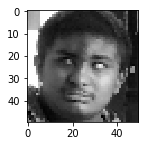

In [41]:
plot_layer_outputs(0)

(50, 50, 1)
-------------------
(46, 46, 64)
-------------------
(23, 23, 64)
-------------------
(19, 19, 128)
-------------------
(9, 9, 128)
-------------------
(10368,)
-------------------
(256,)
-------------------
(256,)
-------------------
(32,)
-------------------
(32,)
-------------------
(4,)
-------------------
image number 64


C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


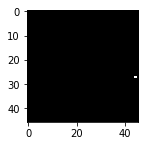

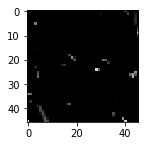

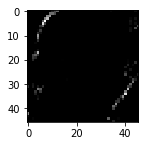

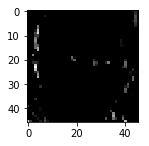

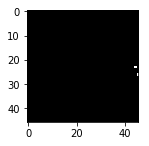

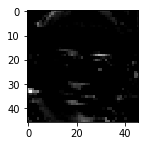

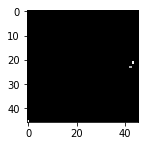

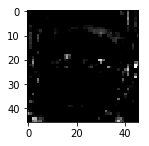

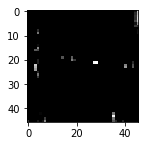

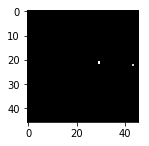

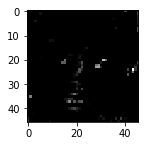

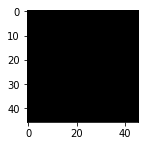

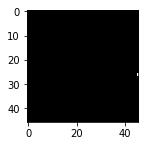

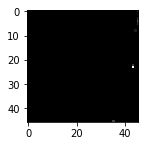

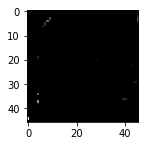

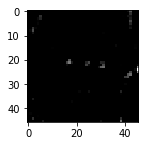

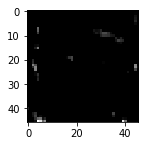

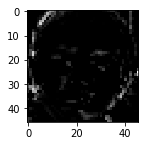

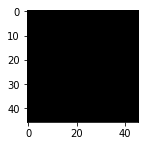

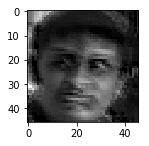

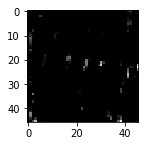

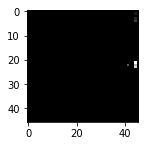

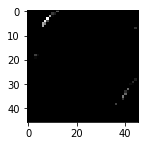

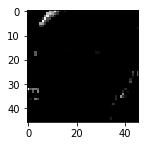

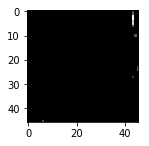

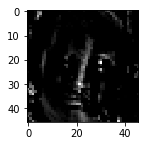

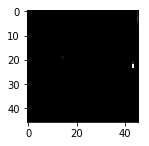

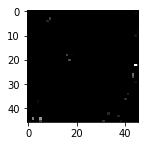

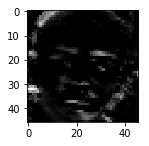

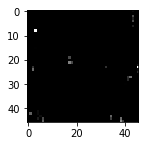

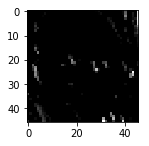

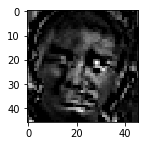

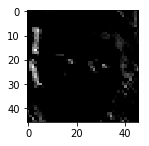

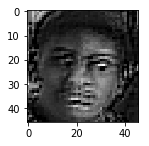

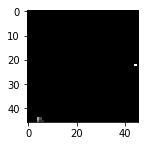

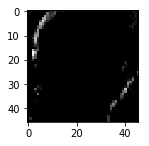

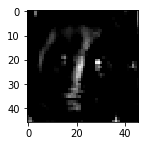

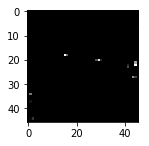

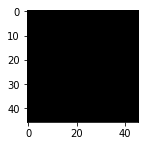

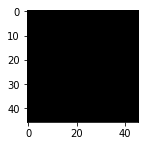

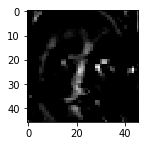

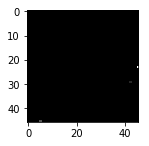

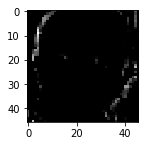

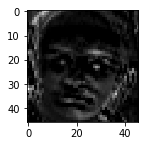

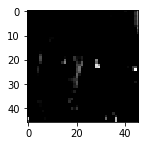

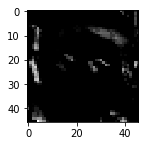

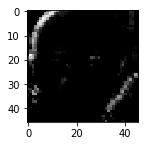

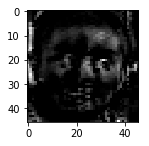

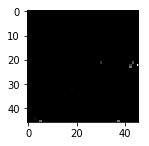

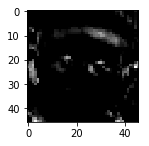

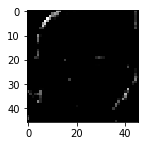

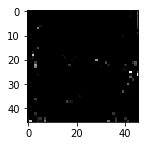

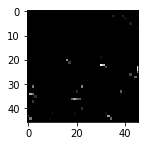

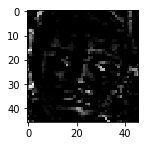

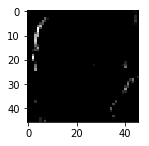

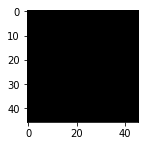

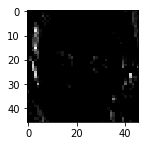

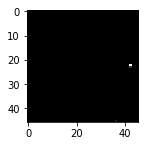

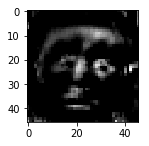

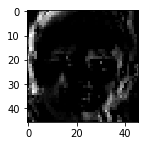

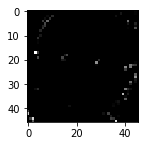

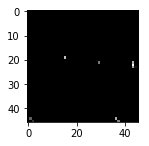

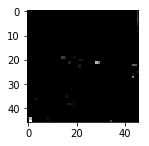

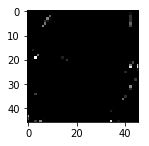

In [18]:
plot_layer_outputs(1)

(50, 50, 1)
-------------------
(46, 46, 64)
-------------------
(23, 23, 64)
-------------------
(19, 19, 128)
-------------------
(9, 9, 128)
-------------------
(10368,)
-------------------
(256,)
-------------------
(256,)
-------------------
(32,)
-------------------
(32,)
-------------------
(4,)
-------------------
image number 64


C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


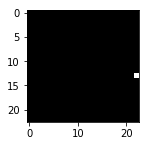

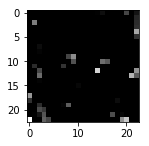

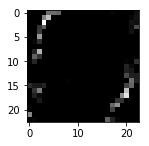

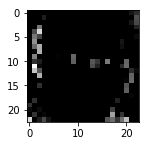

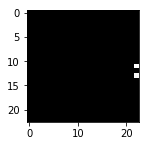

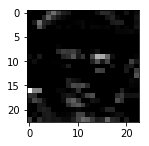

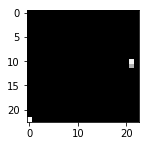

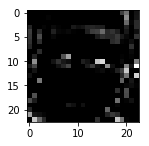

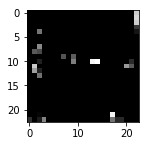

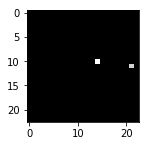

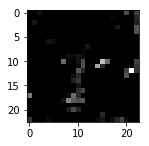

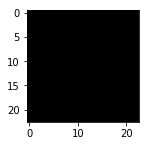

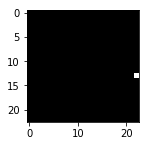

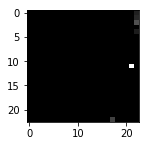

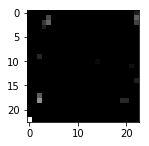

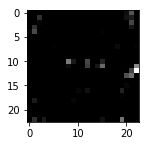

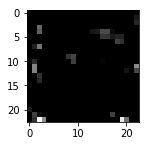

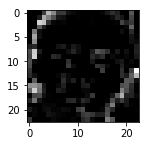

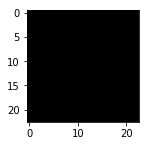

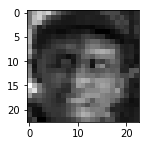

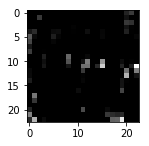

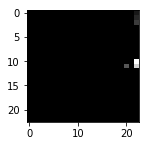

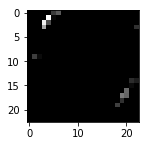

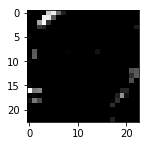

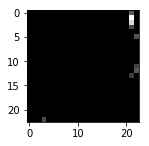

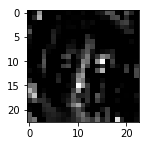

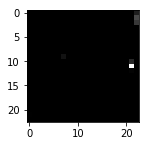

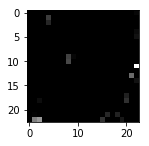

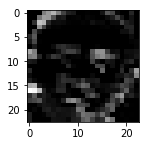

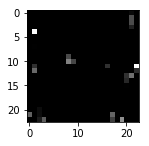

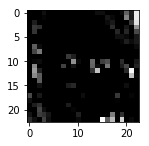

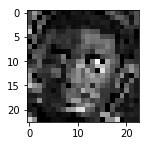

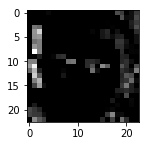

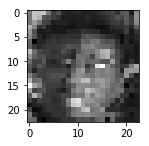

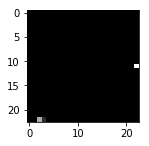

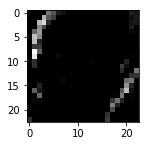

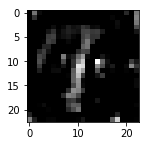

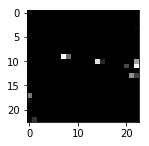

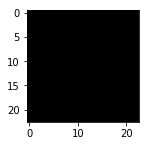

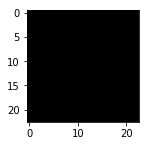

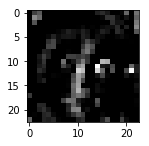

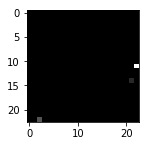

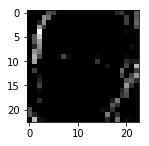

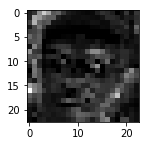

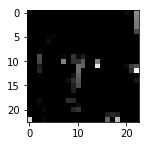

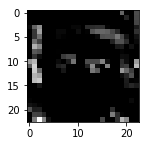

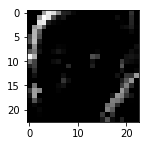

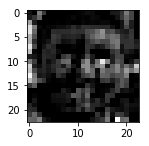

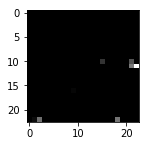

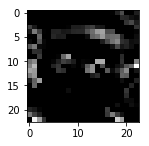

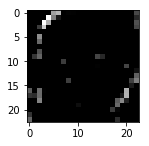

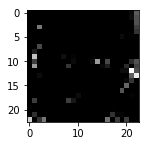

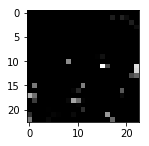

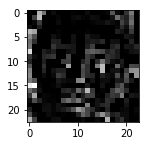

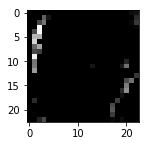

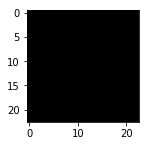

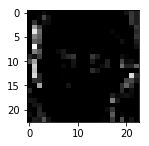

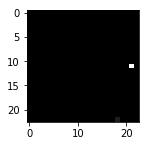

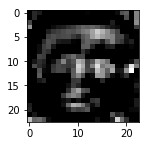

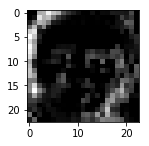

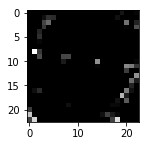

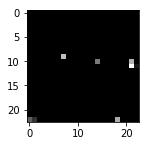

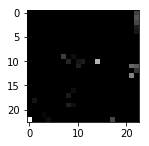

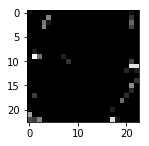

In [19]:
plot_layer_outputs(2)

(50, 50, 1)
-------------------
(46, 46, 64)
-------------------
(23, 23, 64)
-------------------
(19, 19, 128)
-------------------
(9, 9, 128)
-------------------
(10368,)
-------------------
(256,)
-------------------
(256,)
-------------------
(32,)
-------------------
(32,)
-------------------
(4,)
-------------------
image number 128


C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


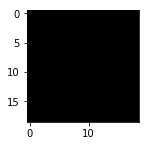

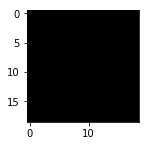

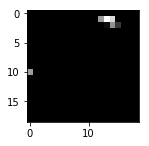

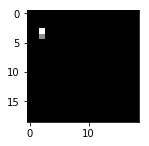

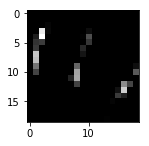

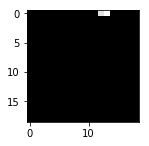

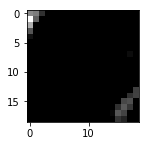

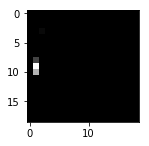

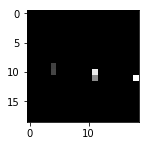

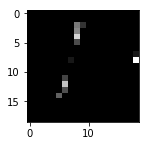

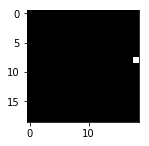

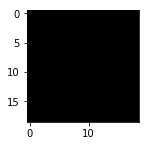

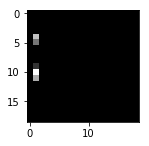

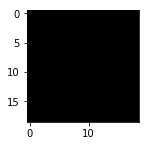

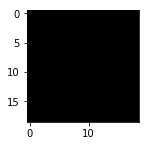

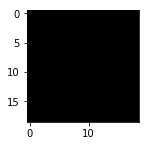

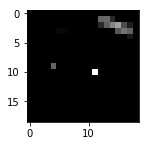

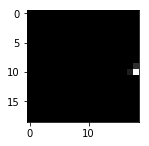

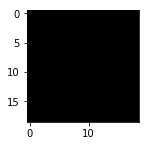

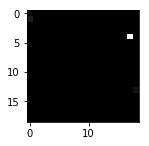

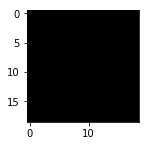

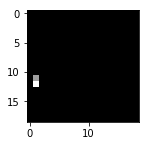

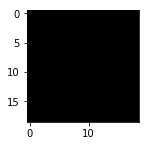

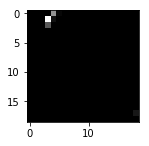

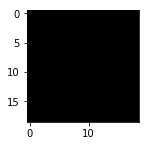

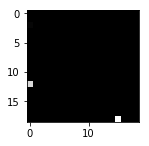

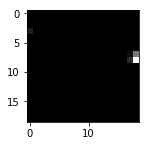

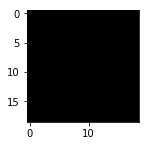

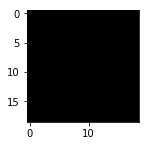

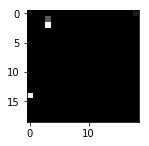

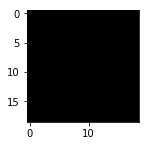

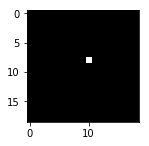

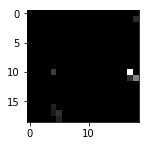

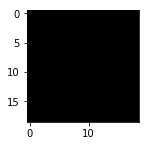

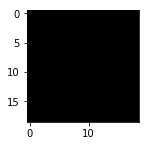

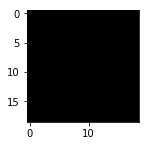

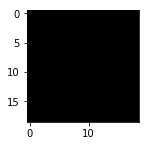

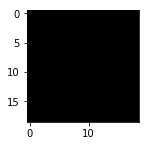

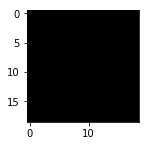

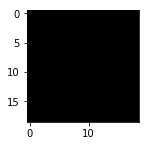

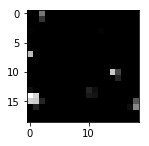

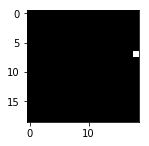

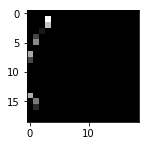

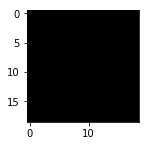

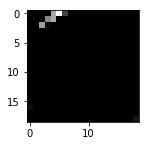

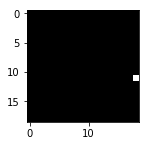

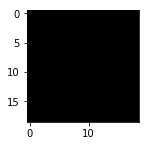

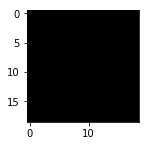

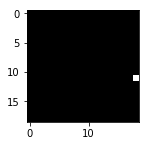

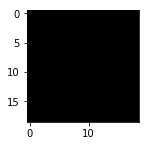

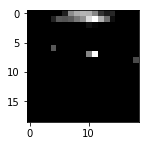

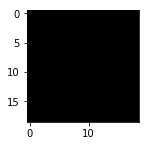

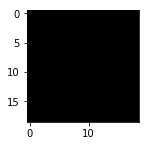

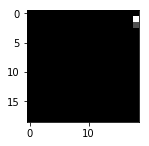

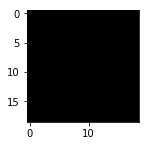

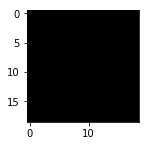

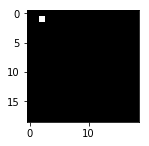

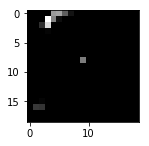

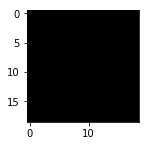

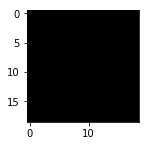

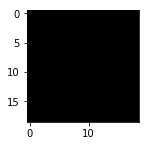

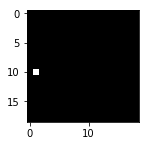

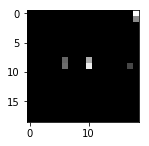

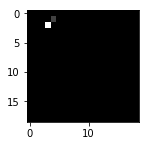

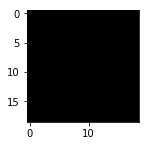

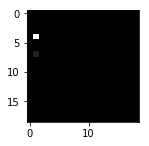

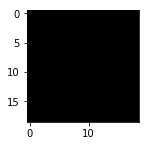

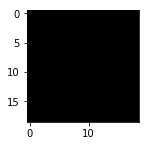

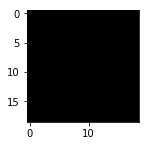

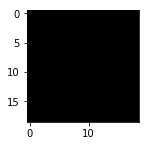

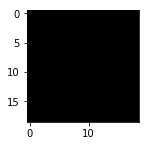

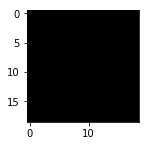

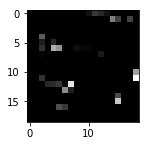

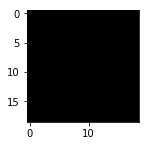

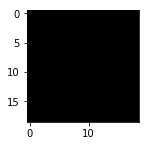

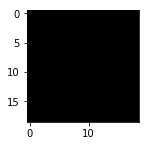

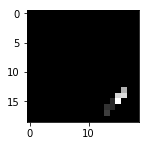

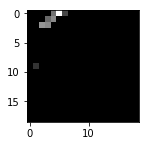

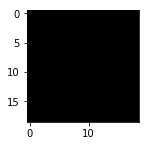

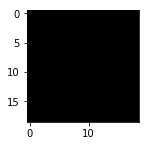

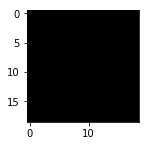

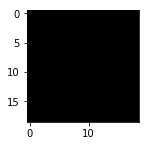

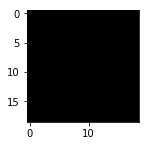

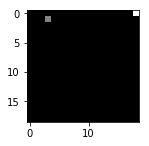

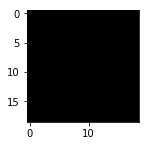

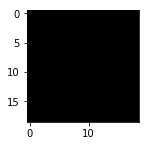

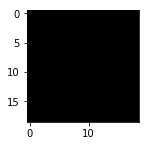

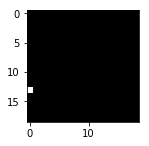

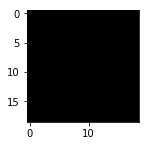

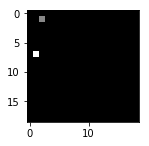

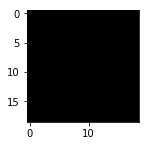

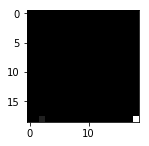

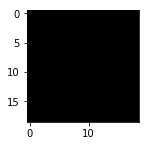

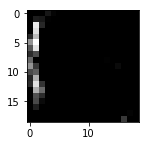

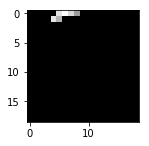

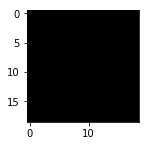

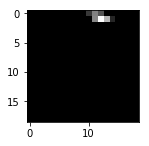

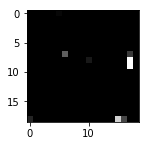

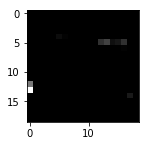

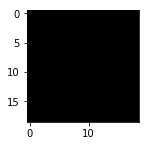

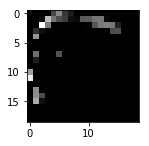

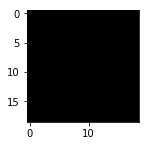

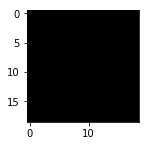

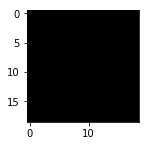

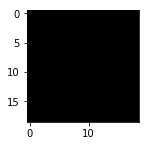

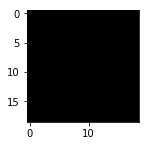

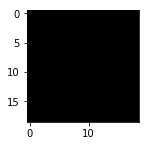

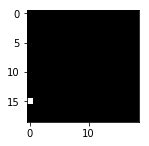

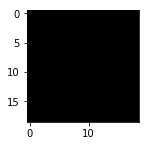

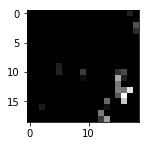

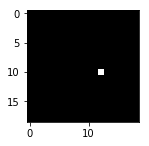

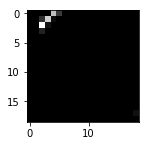

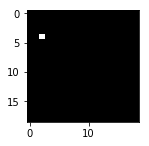

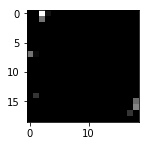

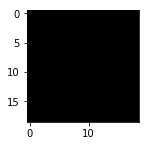

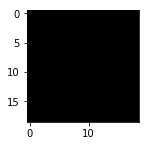

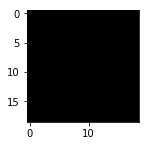

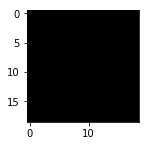

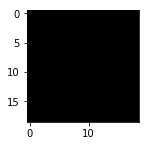

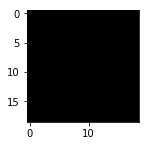

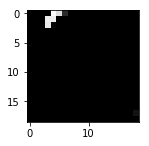

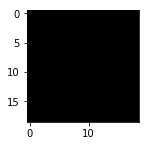

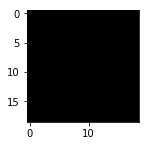

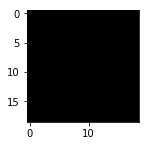

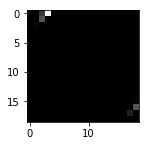

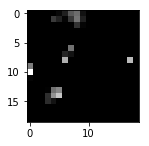

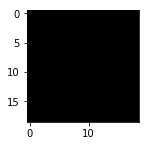

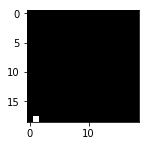

In [20]:
plot_layer_outputs(3)

(50, 50, 1)
-------------------
(46, 46, 64)
-------------------
(23, 23, 64)
-------------------
(19, 19, 128)
-------------------
(9, 9, 128)
-------------------
(10368,)
-------------------
(256,)
-------------------
(256,)
-------------------
(32,)
-------------------
(32,)
-------------------
(4,)
-------------------
image number 128


C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


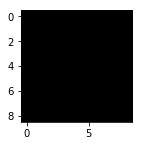

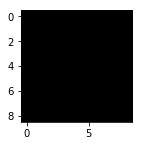

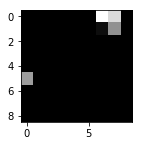

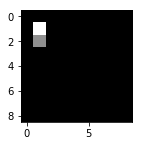

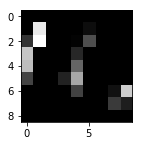

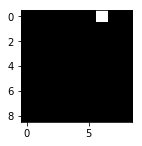

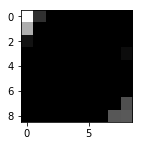

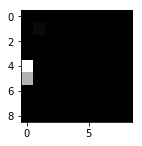

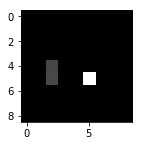

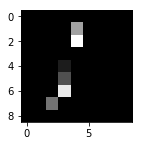

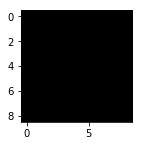

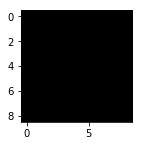

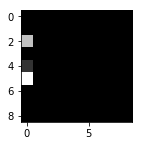

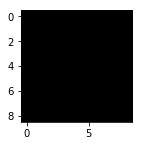

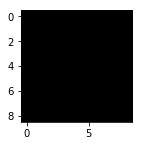

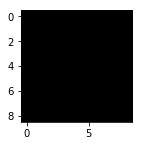

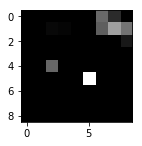

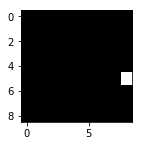

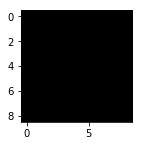

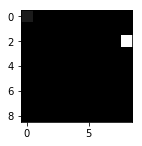

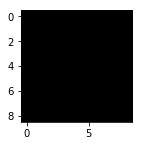

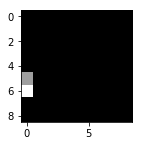

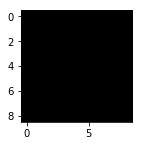

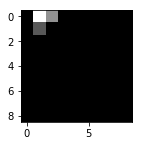

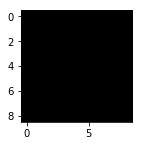

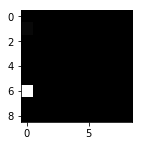

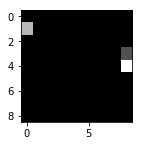

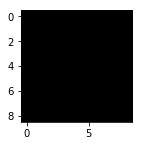

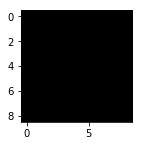

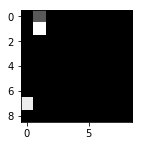

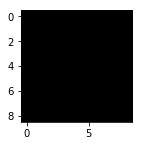

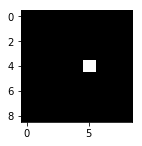

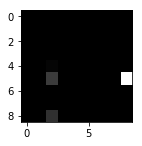

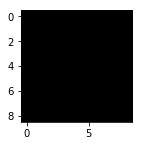

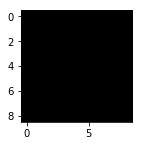

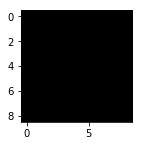

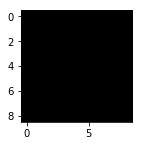

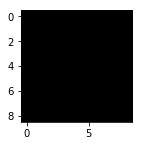

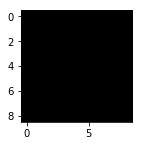

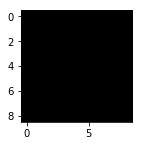

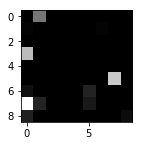

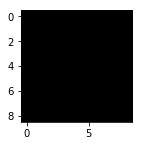

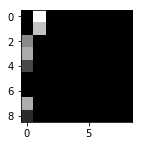

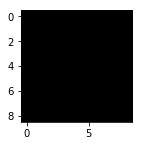

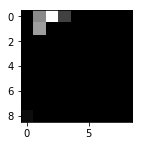

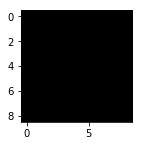

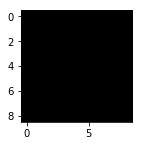

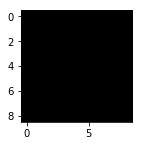

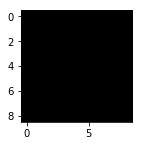

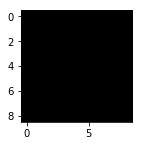

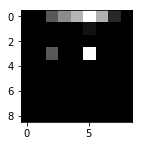

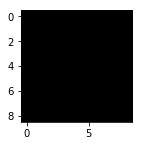

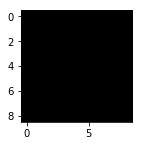

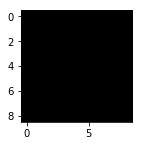

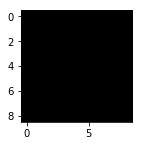

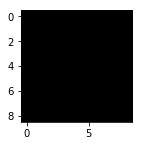

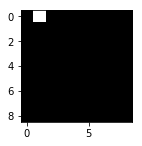

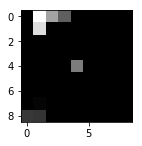

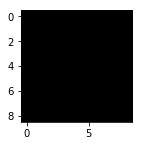

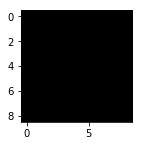

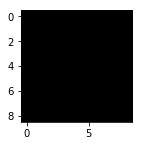

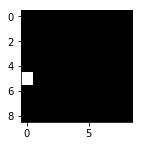

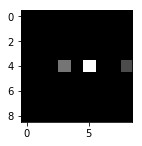

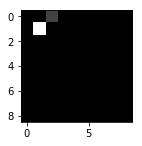

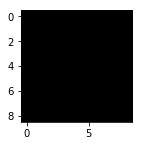

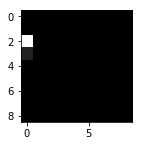

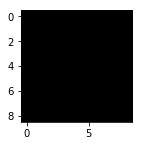

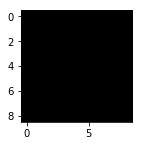

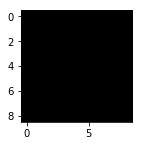

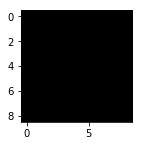

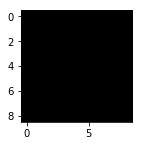

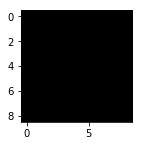

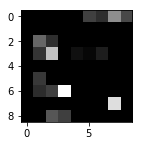

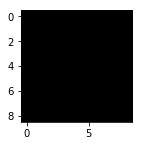

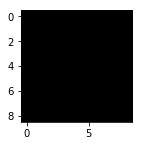

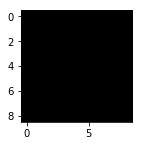

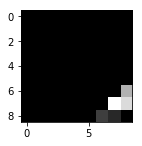

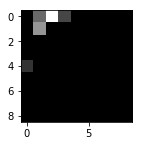

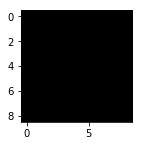

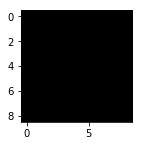

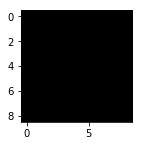

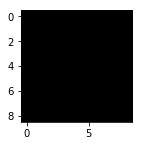

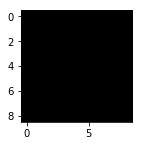

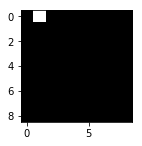

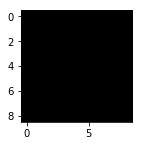

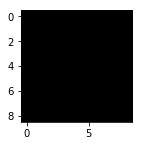

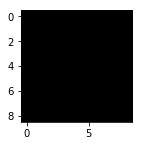

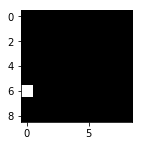

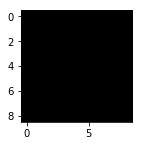

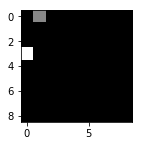

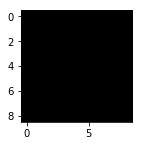

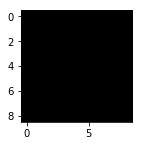

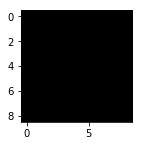

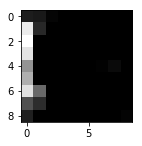

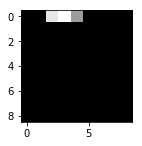

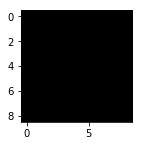

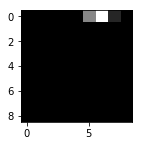

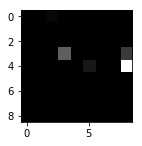

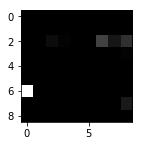

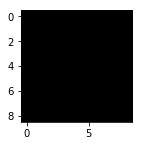

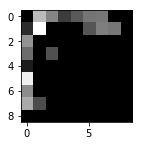

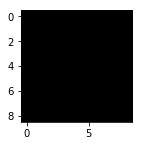

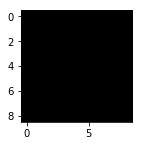

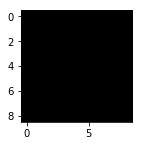

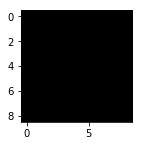

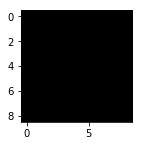

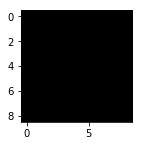

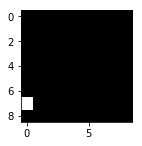

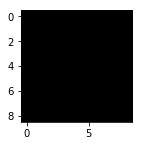

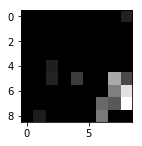

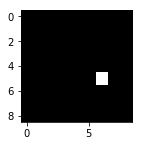

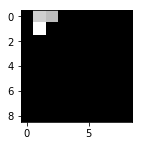

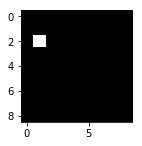

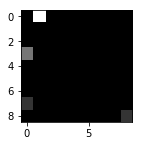

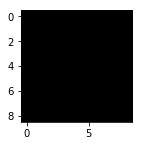

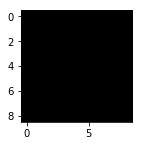

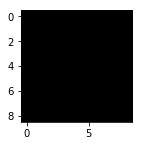

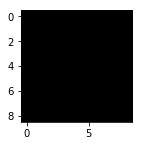

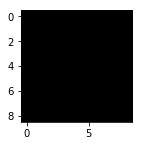

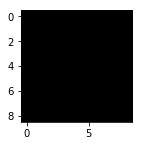

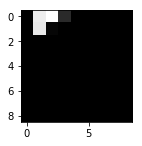

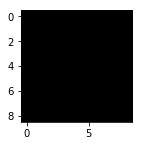

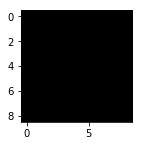

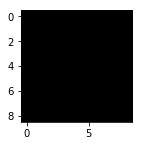

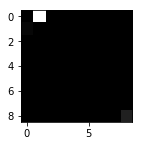

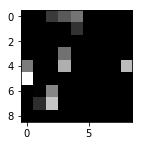

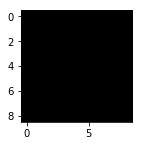

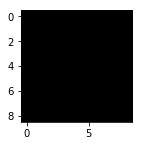

In [21]:
plot_layer_outputs(4)

In [49]:
train_features[65].shape

(50, 50, 1)

In [43]:
model.layers[1].name

'conv2d_1'

In [ ]:
def polt_filter(layer,x,y):
    filters = layer.W.get_value()
    fig = plt.figure()
    for j in range(len(filters)):
        
    

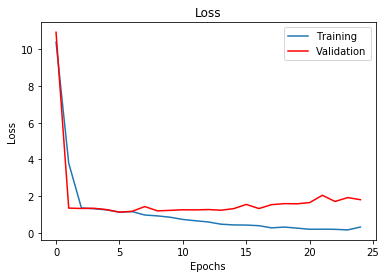

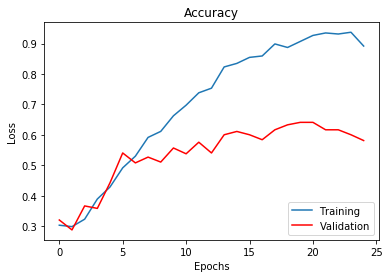

In [13]:
loss = training.history['loss']
val_loss = training.history['val_loss']
acc = training.history['acc']
val_acc = training.history['val_acc']

# loss plot
tra = plt.plot(loss)
val = plt.plot(val_loss, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss')
plt.legend(["Training", "Validation"])

plt.show()

# accuracy plot
plt.plot(acc)
plt.plot(val_acc, 'r')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Accuracy')
plt.legend(['Training', 'Validation'], loc=4)
plt.show()

In [16]:
testing_data = []
for img in tqdm(os.listdir(TEST_DIR)):
#     path = os.path.join(TEST_DIR, img)
#     img_num = img.split('.')[0]
#     img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
#     img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
#     testing_data.append([np.array(img), img_num])
    
    
    
    label = label_img(img)

    path = os.path.join(TEST_DIR, img)

    # loading the image from the path and then converting them into
    # greyscale for easier covnet prob
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    # resizing the image for processing them in the covnet
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))

    # final step-forming the training data list with numpy array of the images
    testing_data.append([np.array(img), np.array(label)])

         
shuffle(testing_data)

100%|███████████████████████████████████████| 299/299 [00:02<00:00, 114.00it/s]


In [17]:
test_features = np.array([i[0] for i in testing_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
test_labels = np.array([i[1] for i in testing_data])
# test_labels = np.argmax(test_labels, axis=1)
print('x: ', test_features.shape)
print('Y: ', test_labels.shape)

x:  (299, 50, 50, 1)
Y:  (299, 4)


In [18]:
from sklearn import metrics
Predicted_label = []
Label_OF_test_data=[]
print("pred")
pred = model.predict(test_features)#, batch_size=batch_size, verbose=1)
# print(pred)
for val in pred:
    if np.argmax(val) == 0:
#         str_label ='Happy'
        Predicted_label.append(0)
    elif np.argmax(val) == 1:
#         str_label ='sad'
        Predicted_label.append(1)
    elif np.argmax(val) == 2:
#         str_label ='Angry'
        Predicted_label.append(2)
    elif np.argmax(val) == 3:
#         str_label ='normal'
        Predicted_label.append(3)
for val in test_labels:
    if np.argmax(val) == 0:
#         str_label ='Happy'
        Label_OF_test_data.append(0)
    elif np.argmax(val) == 1:
#         str_label ='sad'
        Label_OF_test_data.append(1)
    elif np.argmax(val) == 2:
#         str_label ='Angry'
        Label_OF_test_data.append(2)
    elif np.argmax(val) == 3:
#         str_label ='normal'
        Label_OF_test_data.append(3)
    
    
    
    
score=metrics.accuracy_score(Label_OF_test_data, Predicted_label)
print(Label_OF_test_data)
print(Predicted_label)
print('Accuracy cnn : {}'.format(score))
# convert predicions from categorical back to 0...9 digits
# pred_digits = np.argmax(pred, axis=1)
# print(pred_digits)

# score=metrics.accuracy_score(test_labels, pred_digits)
# print(Label_OF_test_data)
# print(Predicted_label)
# print('Accuracy cnn : {}'.format(score))

pred
[1, 2, 2, 2, 1, 1, 1, 0, 1, 0, 0, 3, 1, 0, 0, 3, 1, 0, 3, 2, 2, 1, 3, 0, 3, 0, 1, 1, 0, 1, 0, 1, 2, 1, 2, 2, 3, 0, 2, 2, 1, 0, 2, 1, 2, 0, 2, 0, 3, 1, 0, 3, 0, 3, 0, 3, 3, 2, 2, 1, 1, 3, 0, 1, 1, 0, 1, 2, 0, 2, 0, 2, 3, 2, 0, 0, 2, 3, 1, 1, 2, 2, 1, 0, 0, 0, 2, 3, 3, 0, 3, 0, 0, 3, 1, 1, 3, 1, 3, 3, 0, 1, 3, 0, 1, 1, 3, 2, 2, 0, 2, 1, 0, 3, 1, 3, 2, 0, 3, 3, 0, 1, 2, 1, 3, 3, 2, 2, 3, 2, 3, 1, 2, 2, 0, 0, 0, 3, 3, 3, 0, 1, 3, 2, 1, 3, 2, 2, 2, 0, 3, 3, 3, 1, 3, 3, 3, 0, 1, 2, 1, 0, 2, 3, 2, 2, 0, 2, 1, 1, 3, 1, 1, 3, 3, 3, 1, 0, 1, 1, 3, 3, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3, 1, 2, 2, 2, 3, 3, 1, 1, 2, 0, 2, 3, 0, 3, 1, 3, 1, 1, 0, 2, 0, 0, 0, 3, 1, 1, 0, 2, 1, 2, 1, 2, 3, 3, 2, 2, 1, 0, 0, 0, 2, 2, 0, 3, 0, 2, 1, 1, 1, 3, 1, 2, 3, 2, 0, 3, 2, 1, 3, 0, 2, 3, 3, 3, 2, 0, 2, 2, 3, 3, 3, 3, 0, 0, 2, 2, 0, 1, 2, 0, 3, 3, 2, 1, 2, 2, 1, 1, 1, 2, 0, 0, 1, 0, 3, 2, 2, 2, 3, 2, 3, 0, 1, 0, 2, 0, 0]
[1, 0, 1, 2, 1, 1, 1, 0, 1, 3, 0, 2, 0, 3, 3, 0, 1, 0, 3, 2, 1, 1, 2, 3, 0, 0, 1, 1, 3, 0, 0, 1, 